In [65]:
import pandas as pd #principal herramienta de gestion de datasets como dataframe
import numpy as np #para trabajar con arrays y algunas cuestiones estadisticas
from sklearn import preprocessing #procesamiento de detasets 
from sklearn.metrics import mean_squared_error #herramienta estadistica para medir errores
import seaborn as sns #herramienta grafica
sns.set()
from sklearn.model_selection import train_test_split #para separar el dataset en entrenamiento y testeo
from sklearn.linear_model import LogisticRegression #modelo de regresion logistica para clasificacion
from sklearn.metrics import confusion_matrix #para crear la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay #para graficar la matriz de confusión
from sklearn.model_selection import GridSearchCV #para optimización de hiperparámetro
import joblib #airve para bajar el modelo entrenado y guardarlo como un achivo
import matplotlib.pyplot #herramienta grafica
import matplotlib.pyplot as plt #herramienta grafica
from sklearn.model_selection import cross_validate #para validacion cruzada 
from sklearn.metrics import accuracy_score #metrica accuracy
from sklearn.metrics import precision_score #metrica precisión
from sklearn.metrics import recall_score #metrica recall
from sklearn.metrics import f1_score #metrica f1 score
import warnings #evita que se llene de warnings el script
warnings.filterwarnings("ignore", category=FutureWarning) #evita que se llene de warnings el script
from sklearn.preprocessing import OrdinalEncoder # preprocesamiento de columna
import os #creación de directorio
from pathlib import Path as pl #para generar el archivo

In [22]:
#clono el repositorio

In [23]:
!git clone https://github.com/soyHenry/Datathon.git

fatal: destination path 'Datathon' already exists and is not an empty directory.


In [24]:
#ingesto los datos en dataframe de pandas

In [25]:
df_train=pd.read_csv('Datathon/hospitalizaciones_train.csv')

In [26]:
#realizo una copia para trabajar con back up de los datos crudos 

In [27]:
df1=df_train.copy()

In [28]:
#creo una funcion para adaptar la columna label a categórica

In [29]:
def transf_label(df):
    lista_dias=df['Stay (in days)']
    lista_estancia=[]
    for i in lista_dias:
        if i <=8: 
            i=0
        elif i>8:
            i=1
        lista_estancia.append(i)
    array_estancia=np.array(lista_estancia)
    array_estancia.reshape(1,-1)
    array_estancia.shape
    df['estancia']=array_estancia
    df.drop(columns=['Stay (in days)'], inplace=True)
    return df

In [30]:
#aplico la función

In [31]:
transf_label(df1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


In [32]:
#Realizo una transormación de las columnas categoricas a numéricas 
#con label encoder en las no ordinales y ordinal encoder en las que si

In [33]:
le = preprocessing.LabelEncoder()
df1['Insurance'] = le.fit_transform(df1['Insurance'])
df1['health_conditions'] = le.fit_transform(df1['health_conditions'])
df1['Type of Admission'] = le.fit_transform(df1['Type of Admission'])
df1['gender'] = le.fit_transform(df1['gender'])
df1['doctor_name'] = le.fit_transform(df1['doctor_name'])
df1['Ward_Facility_Code'] = le.fit_transform(df1['Ward_Facility_Code'])
df1['Department'] = le.fit_transform(df1['Department'])

In [34]:
enc = OrdinalEncoder()
df1['Age'] = enc.fit_transform(df1[['Age']])
df1['Severity of Illness'] = enc.fit_transform(df1[['Severity of Illness']])

In [35]:
 #se generan 2 data frame con distintas columnas para aplicar el modelo y analizar diferencias 

In [36]:
df2=df1.copy()

In [37]:
df3=df1.copy()

In [38]:

# ACONTINUACIÓN SE PUEDE VER TODOS LOS MODELOS GENERADOS Y SUS METRICAS CONSIDERANDO DISTINTAS FREATURES 
#_ ESTE PUNTO SE EXPLICA MEJOR EN EL TXT ESTRATEGIA FINAL

y1=df1[['estancia']]
#TODO _ x=df[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','staff_available','patientid','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
X1=df1[['Department','Age', 'doctor_name']]
'''
accuracy:  0.6024512195121952
Recall:  0.8172358171374616
F1score: 0.7182186724753433
'''
#X1=df1[['Department','Age', 'doctor_name','gender']]
'''
accuracy:  0.586329268292683
Recall:  0.8226650405224644
F1score: 0.7114653419868496
'''
'''
--------------0.3
El valor de la precisión para este modelo es de [0.4560795  0.64296281]
El valor de la recall es de [0.25191037 0.81765805]
El valor de accuracy es de 0.6039756097560975
El f1-score es de:[0.32455593 0.71986336], type[0.32455593 0.71986336]
--------0.2
El valor de la precisión para este modelo es de [0.45788829 0.64286926]
El valor de la recall es de [0.25297475 0.81784306]
El valor de accuracy es de 0.6042195121951219
El f1-score es de:[0.32589731 0.7198764 ], type[0.32589731 0.7198764 ]

'''

#X1=df1[['Department','Age', 'doctor_name','gender']]
'''
------------0.3
El valor de la precisión para este modelo es de [0.40814987 0.62924725]
El valor de la recall es de [0.20072325 0.82334113]
El valor de accuracy es de 0.5881788617886179
El f1-score es de:[0.26910424 0.71332684], type[0.26910424 0.71332684]
'''

#X1=df1[['Department','Age', 'doctor_name','gender','Insurance']]
'''
---------0.3
El valor de la precisión para este modelo es de [0.40814987 0.62924725]
El valor de la recall es de [0.20072325 0.82334113]
El valor de accuracy es de 0.5881788617886179
El f1-score es de:[0.26910424 0.71332684], type[0.26910424 0.71332684]

'''

#X1=df1[['Department']]
'''
-------------0.3
El valor de la precisión para este modelo es de [0.36356172 0.61923465]
El valor de la recall es de [0.17155649 0.81772337]
El valor de accuracy es de 0.5736666666666667
El f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]
-------------0.2
El valor de la precisión para este modelo es de [0.36266978 0.61846282]
El valor de la recall es de [0.17048789 0.81778423]
El valor de accuracy es de 0.5729878048780488
El f1-score es de:[0.23194192 0.70429268], type[0.23194192 0.70429268]
'''
#con todo menos ID
#X1=df1[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','staff_available','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
''' 
---------------0.3
El valor de la precisión para este modelo es de [0.39985609 0.6287695 ]
El valor de la recall es de [0.23923198 0.78207021]
El valor de accuracy es de 0.5770406504065041
El f1-score es de:[0.29935894 0.69709109], type[0.29935894 0.69709109]
-----0.2
El valor de la precisión para este modelo es de [0.39985609 0.6287695 ]
El valor de la recall es de [0.23923198 0.78207021]
El valor de accuracy es de 0.5770406504065041
El f1-score es de:[0.29935894 0.69709109], type[0.29935894 0.69709109]
'''
# con todo menos id - staff available 
#X1=df1[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
'''
El valor de la precisión para este modelo es de [0.36356172 0.61923465]
El valor de la recall es de [0.17155649 0.81772337]
El valor de accuracy es de 0.5736666666666667
El f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]
'''

'\nEl valor de la precisión para este modelo es de [0.36356172 0.61923465]\nEl valor de la recall es de [0.17155649 0.81772337]\nEl valor de accuracy es de 0.5736666666666667\nEl f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]\n'

In [39]:
#realizo la primera partición de los datos, luego se hará una validación cruzada

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=8) 

# datos, dejo un 20% para testear

print(X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(328000, 3) (328000, 1) (82000, 3) (82000, 1)


In [40]:
# Instanciamos el modelo y lo entrenamos

clf = LogisticRegression()

# Lo entrenamos

clf.fit(X1_train,y1_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
# Predecimos

y1_test_pred = clf.predict(X1_test)
y1_train_pred=clf.predict(X1_train)



In [44]:
#VALIDACIÓN CRUZADA DEL MODELO

In [45]:
logistica_scores = cross_validate(clf, X1, y1, cv=5, return_train_score=True, n_jobs = -1)

In [46]:
y1_test_pred = clf.predict(X1_test)
y1_train_pred=clf.predict(X1_train)

In [47]:
#VUELVO A MEDIR LAS METRICAS DESPUES DE LA VALIDACIÓN

In [55]:
print("accuracy: ", metrics.accuracy_score(y1_test,y1_test_pred))
print("Recall: ", metrics.recall_score(y1_test,y1_test_pred))
print("F1score:", metrics.f1_score(y1_test,y1_test_pred))

accuracy:  0.6024512195121952
Recall:  0.8172358171374616
F1score: 0.7182186724753433


In [48]:
#EXACTITUD
exactitud = accuracy_score(y1_test, y1_test_pred)

#PRECISION
precision = precision_score(y1_test, y1_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y1_test, y1_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y1_test, y1_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')

El valor de la precisión para este modelo es de [0.45815595 0.64060259]
El valor de la recall es de [0.25208574 0.81723582]
El valor de accuracy es de 0.6024512195121952
El f1-score es de:[0.32522614 0.71821867], type[0.32522614 0.71821867]


In [ ]:
#GURADO EL MODELO YA ENTRENADO 

In [49]:
joblib.dump(clf,'logistica_entrenado_Colab')

['logistica_entrenado_Colab']

In [ ]:
#se desarrolla y grafica la matriz de confusion para comprender donde hay margen para subrir el accuracy y que debemos sacrificar

In [50]:
matrix = confusion_matrix(y1_train, y1_train_pred)
matrix_2 = confusion_matrix(y1_test, y1_test_pred)

In [51]:
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


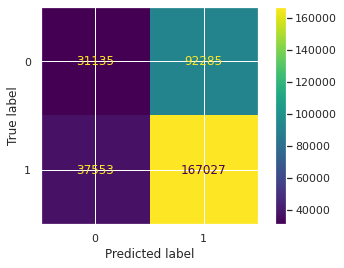

In [52]:
cm_display.plot()
plt.show()

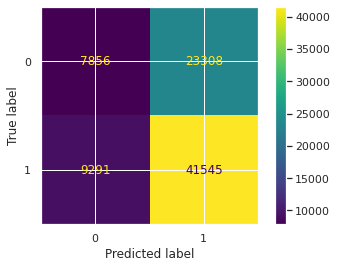

In [53]:
cm_display_2.plot()
plt.show()

In [ ]:
#IMPORTANTE: Se guardan los datos, se reliza la prediccion y se suben para el analisis del dashboard



In [54]:
df_test_f=pd.read_csv('Datathon/hospitalizaciones_test.csv')

In [56]:
le = preprocessing.LabelEncoder()
df_test_f['Department'] = le.fit_transform(df_test_f['Department'])
df_test_f['doctor_name'] = le.fit_transform(df_test_f['doctor_name'])

In [57]:
enc = OrdinalEncoder()
df_test_f['Age'] = enc.fit_transform(df_test_f[['Age']])

In [ ]:
#RELIZO LA PREDICCION FINAL CON EL DATASET DE TEST

In [58]:
Xf=df_test_f[['Department','Age','doctor_name']]

In [59]:
y_test_pred_f=clf.predict(Xf)

In [60]:
type(y_test_pred_f)

numpy.ndarray

In [61]:
df_f2=pd.DataFrame()

In [62]:
df_f2['pred']=y_test_pred_f 

In [63]:
df_f2.sample(5)

,pred
16644,0
15569,1
83561,1
51998,0
2594,0


In [ ]:
#EXPORTO EL ARCHIVO COMO CSV _ PARA LA ENTREGA 

In [66]:
filepath = pl('csv_prediccion_logistica/alitfasce.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_f2.to_csv(filepath,
                 sep= ",",
                 na_rep= "null",
                 header= True,
                 index= False,
                 index_label= None,
                 mode= "w",
                 encoding= "utf-8",
                 compression= "infer",            
                 decimal= "."
                 ) 
os.makedirs('csv_prediccion_logistica', exist_ok=True)  
df_f2.to_csv('csv_prediccion_logistica/alitfasce.csv', index=False)  